## Import Python packages

In [2]:
import calendar
import os
import sys
import time

## Import data analysis, machine learning, and visualization packages

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf

from numpy.random import default_rng

print(f"TensorFlow version:{tf.__version__}")
print(f"Matplotlib version:{matplotlib.__version__}")

TensorFlow version:2.16.1
Matplotlib version:3.7.2


## Import methods from OEDI data imputation module

In [4]:
baseDir=os.path.dirname(os.path.dirname((os.path.dirname(os.getcwd())))) #Add path of working directory e.g.'/home/splathottam/GitHub/oedi'
print(f"Adding base directory:{baseDir} to path")
sys.path.insert(0,baseDir) #Add module path to prevent import errors

from datapreprocessor.datapreprocessor.app.nodeload.utility_data_adapter import SmartMeterData
from datapreprocessor.datapreprocessor.app.nodeload.nodeload_utilities import create_average_timeseries_profiles,generate_load_node_profiles
from datapreprocessor.datapreprocessor.app.nodeload.datapipeline_utilities import get_train_test_eval_nodes,df_to_input_target_dataset

from datapreprocessor.datapreprocessor.app.dataimputation.data_imputation_preprocessing import get_df_node_load_selected_nodes,get_knn_array
from datapreprocessor.datapreprocessor.app.dataimputation.data_imputation_postprocessing import compare_performance_moving_window,evaluate_dataimputation_on_streaming_data_multi_nodes
from datapreprocessor.datapreprocessor.app.dataimputation.model_utilities import get_knn_imputer_predictions,get_knn_imputer
from datapreprocessor.datapreprocessor.app.model_utilities.model_utilities import get_autoencoder_model,get_compiled_model,get_checkpoint_callback,get_normalizer,evaluate_predict
from datapreprocessor.datapreprocessor.app.model_utilities.model_training_utilities import train_model,get_best_model
from datapreprocessor.datapreprocessor.app.model_utilities.model_save_load_utilities import model_to_archive,load_keras_model

rng = default_rng()

Adding base directory:c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor to path


## Highlevel block diagram of datapreprocessing module

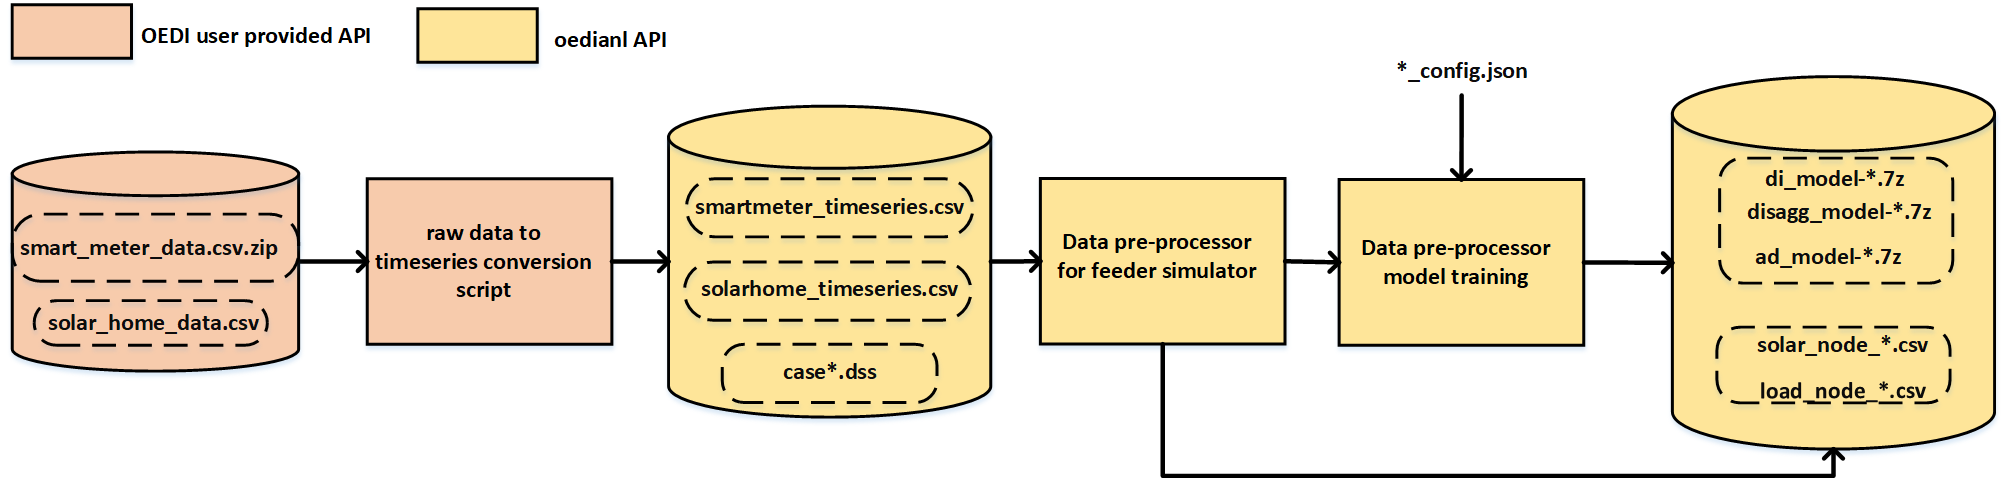

## Specify locations of time series data

In [7]:
folder_name_zipped = os.path.join(baseDir,"datapreprocessor","datapreprocessor","data","smartmeter","smartmeter_zipped")
folder_name_raw = os.path.join(baseDir,"datapreprocessor","datapreprocessor","data","smartmeter","smartmeter_unzipped")
folder_name_timeseries_smartmeter = os.path.join(baseDir,"datapreprocessor","datapreprocessor","data","smartmeter")
folder_name_timeseries_solar = os.path.join(baseDir,"datapreprocessor","datapreprocessor","data","solarhome")
folder_name_plots = os.path.join(baseDir,"datapreprocessor","datapreprocessor","app","dataimputation","plots")

## Create a data object to do first level preprocessing of the time series data

In [8]:
smartmeter1 = SmartMeterData(folder_name_raw= folder_name_raw,folder_name_time_series=folder_name_timeseries_smartmeter,folder_name_zipped=folder_name_zipped,
                   plot_load_types=False,check_subfolders=True,show_details=False,unzip_zipped_files=False)

Current directory: c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor


## Select timeseries file for use as base file

In [9]:
selected_timeseries_files  = ["2016_02_60621_time_series.csv"] #Specify file containing zip code level data #"2016_02_60621_time_series.csv"
selected_timeseries_files = [os.path.join(folder_name_timeseries_smartmeter,timeseries_file) for timeseries_file in selected_timeseries_files]
print(selected_timeseries_files)

['c:\\Users\\splathottam\\Box Sync\\GitHub\\oedi-si-single-container\\build\\datapreprocessor\\datapreprocessor\\datapreprocessor\\data\\smartmeter\\2016_02_60621_time_series.csv']


## Exploration on time series file

0it [00:00, ?it/s]


Total expected customers columns:11559
Load_residential_single-count:4326
Load_residential_multi-count:6701
Load_residential_single_spaceheat-count:17
Load_residential_multi_spaceheat-count:172
Load_commercial-count:156
Load_0_100-count:170
Load_100_400-count:17
Load_400_1000-count:0
Calculated 11559 loads, expected:11558
Removing Load_400_1000


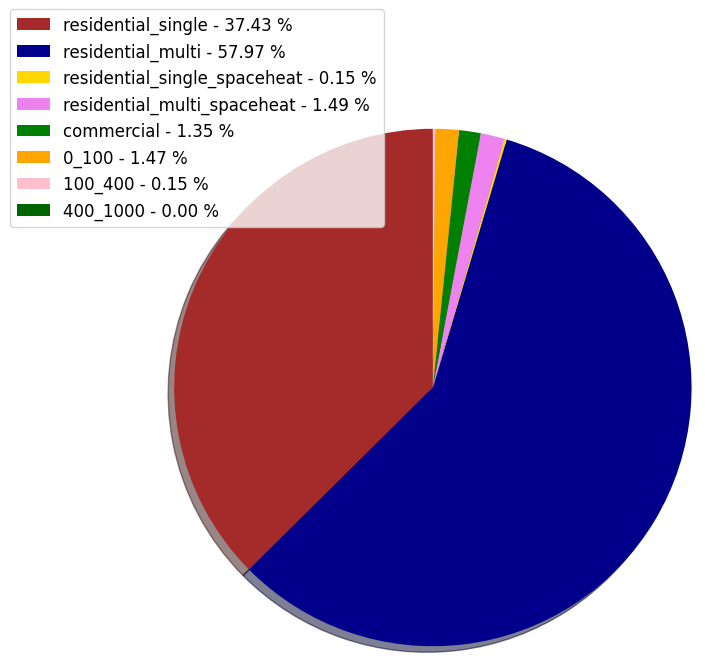

Load_residential_single:
Mean:0.49
Max:43.97
Load_residential_single:
Mean:0.49
Max:43.97
Load_residential_multi:
Mean:0.27
Max:31.97
Load_residential_multi:
Mean:0.27
Max:31.97
Load_residential_single_spaceheat:
Mean:2.02
Max:10.94
Load_residential_single_spaceheat:
Mean:2.02
Max:10.94
Load_residential_multi_spaceheat:
Mean:0.74
Max:7.24
Load_residential_multi_spaceheat:
Mean:0.74
Max:7.24
Load_commercial:
Mean:0.34
Max:13.41
Load_commercial:
Mean:0.34
Max:13.41
Load_0_100:
Mean:2.59
Max:33.28
Load_0_100:
Mean:2.59
Max:33.28
Load_100_400:
Mean:18.9
Max:83.52
Load_100_400:
Mean:18.9
Max:83.52


In [10]:
df_base= smartmeter1.count_load_types(plot_pie=True,n_files=1000,timeseries_files = selected_timeseries_files)

## Generated averaged load profiles for all load type within the selected time series file

In [8]:
upsample_original_time_series = True
upsample_time_period="15Min"
selected_month = 2 
df_averaged_load,df_averaged_day_load = create_average_timeseries_profiles(timeseries_files=selected_timeseries_files,month=selected_month,convert_to_kW=True,upsample=upsample_original_time_series,upsample_time_period=upsample_time_period)

Found 11559 loads in c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\data\smartmeter\2016_02_60621_time_series.csv
Found following 7 unique_loads:
Filtering for load type pattern:residential_multi_spaceheat_\d
Filtering for load type pattern:commercial_\d
Filtering for load type pattern:residential_multi_\d
Filtering for load type pattern:residential_single_spaceheat_\d
Filtering for load type pattern:100_400_\d
Filtering for load type pattern:residential_single_\d
Filtering for load type pattern:0_100_\d
Total identified loads:11559 in c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\data\smartmeter\2016_02_60621_time_series.csv
Following 7 load types were found:['residential_multi_spaceheat', 'commercial', 'residential_multi', 'residential_single_spaceheat', '100_400', 'residential_single', '0_100']
'datetime' column not found in time series dat

c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\nodeload\nodeload_utilities.py:146: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_averaged_load[datetime_column]  = pd.to_datetime(df_timeseries[datetime_column], infer_datetime_format=True) #, format='%Y-%m-%d-%H:%M:%S'


Averaging 17 loads of residential_single_spaceheat
Averaging 17 loads of 100_400
Averaging 4326 loads of residential_single
Averaging 170 loads of 0_100
Converting kWh to kW with a time delta of:0.5 hour
Converting following columns:['residential_multi_spaceheat', 'commercial', 'residential_multi', 'residential_single_spaceheat', '100_400', 'residential_single', '0_100'] to kWh
Upsampling to 15Min
Original time period:1800.0 seconds
Original time period:30 minutes
Resampled time period:15 minutes
Load type:residential_multi_spaceheat - Total kWH:Before resampling:1026.93,After resampling with time delta of 0.25 hr:1026.93
Expected length of averaged load df:2784 - actual:2784
Length of weekend averaged load df:768
Length of weekday averaged load df:2016
Total weekend days:8
Total weekday days:21
Difference in means for residential_multi_spaceheat:0.0000
Difference in means for commercial:0.0000
Difference in means for residential_multi:-0.0000
Difference in means for residential_single

c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\nodeload\nodeload_utilities.py:192: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_averaged_day_load[f"{load_type}_day_{i+1}"] = df_averaged_load.loc[i*n_timesteps_per_day:(i+1)*n_timesteps_per_day-1,load_type].values
c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\nodeload\nodeload_utilities.py:192: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

## Visualize averaged day load

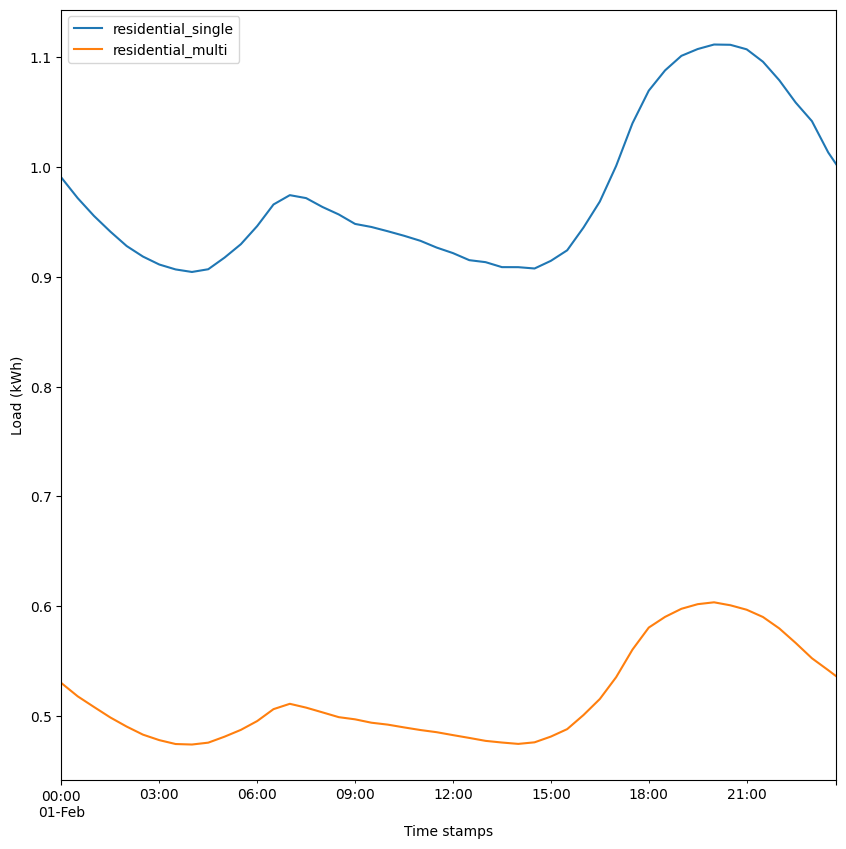

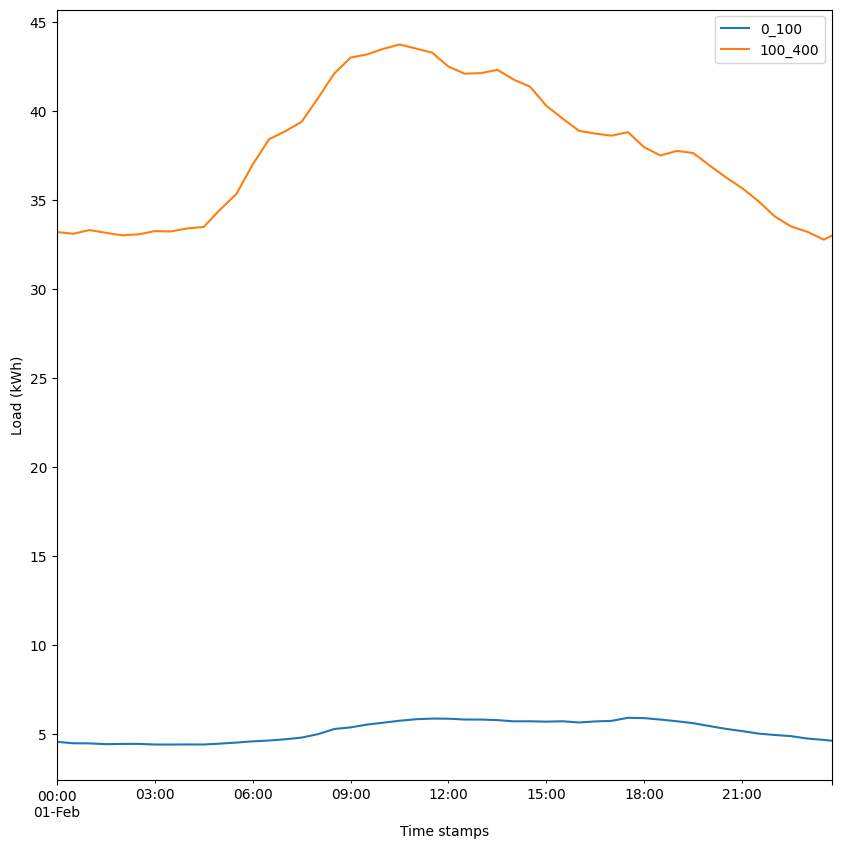

In [9]:
df_averaged_day_load.plot(x="datetime",y=['residential_single', 'residential_multi'],xlabel='Time stamps', ylabel='Load (kWh)',figsize=(10,10)).get_figure().savefig("averaged_day_load_residential.png") #, 'medium_100_400' , 'residential_single_spaceheat', 'residential_multi_spaceheat'
df_averaged_day_load.plot(x="datetime",y=['0_100', '100_400'],xlabel='Time stamps', ylabel='Load (kWh)',figsize=(10,10)).get_figure().savefig("averaged_day_load_commerical.png")

## Specify details of anonymized node load profiles

In [10]:
selected_month = 2 # The month for which we developing the profiles
distribution_system = "123Bus" #The distribution system we are generating the profiles
n_nodes = 10#100 #The number of node load profiles to be generated
n_days = 25 # The number of days for which we are generating the profiles
load_scaling_mode = "simple" #multi # Method of scaling

## Generate anonymized node load profiles for the slected distribution system model

In [11]:
opendss_casefile = os.path.join(baseDir,"datapreprocessor","datapreprocessor","data","opendss",distribution_system,"case123.dss")
df_node_load,load_node_dict = generate_load_node_profiles(df_averaged_day_load,case_file=opendss_casefile,n_nodes=n_nodes,n_days=n_days,start_year = 2016,start_month=selected_month,start_day=1,scaling_type=load_scaling_mode)


Creating energy profile for year:2016,month:2 with averaged profiles of following 7 loads:['residential_multi_spaceheat', 'commercial', 'residential_multi', 'residential_single_spaceheat', '100_400', 'residential_single', '0_100']
Loading OpenDSS case file:c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\data\opendss\123Bus\case123.dss
Found 91 nodes
Number of phase_a: 38
Number of phase_b: 23
Number of phase_c: 28
Selecting first 10 nodes from 91 nodes
Number of time steps per day:96
Time interval in minutes:15 min
Time interval in minutes:15 min


100%|██████████| 25/25 [00:00<00:00, 457.57it/s]


## Visualize anonymized node load profiles

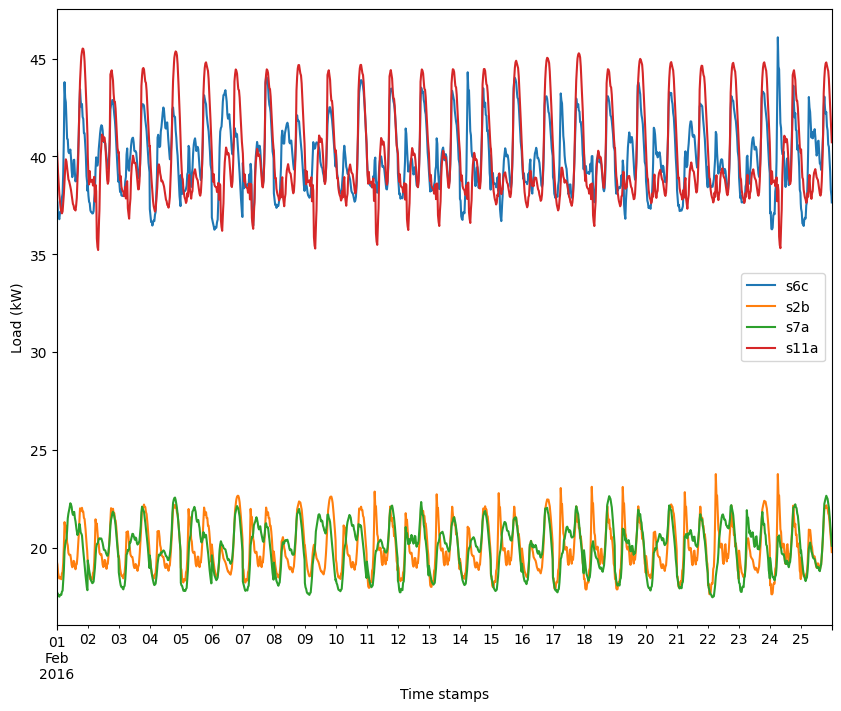

In [12]:
node_choices =list(rng.choice(list(load_node_dict.keys()),size = 4,replace=False))
df_node_load.plot(x = "datetime",y =node_choices,xlabel='Time stamps', ylabel='Load (kW)',figsize=(10,8)).get_figure().savefig(f"{load_scaling_mode}_scaled_nodeload.png")
#print(df_node_load.describe())#.loc["std",:].mean())

## Training data specifications

In [13]:
missing_fraction = 0.05 #The minimum fraction of values that will be missing in the training data
consecutive_missing = True #Should consecutive values be missing
consequtive_missing_probabilities = {"two":{"conditional_probability":0.2},
                                        "three":{"conditional_probability":0.1},
                                        "four":{"conditional_probability":0.05}}
replacement_methods=["ffill"]#,"bfill","mean","median","LI"]
cyclical_features = ["hour_of_day",'day_of_week','weekend'] #Cyclical features to be added to the training data

## Specify train and test nodes

In [14]:
selected_train_nodes,selected_test_nodes,selected_eval_nodes = get_train_test_eval_nodes(load_node_dict,train_fraction=0.75,test_fraction=0.2)

Total train samples:6
Total test samples:3
Total eval samples:1
Train nodes:6,Test nodes:3,Eval nodes:1


## Generate training and testing data

In [15]:
df_train = get_df_node_load_selected_nodes(df_node_load,cyclical_features,selected_train_nodes,missing_fraction,multi_corruption=consecutive_missing,consequtive_corruption_probabilities=consequtive_missing_probabilities,replacement_methods=replacement_methods)
df_test = get_df_node_load_selected_nodes(df_node_load,cyclical_features,selected_test_nodes,missing_fraction,multi_corruption=consecutive_missing,consequtive_corruption_probabilities=consequtive_missing_probabilities,replacement_methods=replacement_methods)
#df_train[df_train["corruption_encoding"]==1]

n_train_samples = len(df_train)

Selected 6 load nodes containing 2400 time steps were selected:['s11a', 's4c', 's5c', 's6c', 's7a', 's9a'] (showing only first 50)
Encoding cyclical feature:hour_of_day
Encoding cyclical feature:day_of_week
Encoding cyclical feature:weekend
Probability of atleast one missing value:0.05
Probability of two consequtive missing values:0.0100
Probability of three consequtive missing values:0.0010
Probability of four consequtive missing values:0.0001


100%|██████████| 14400/14400 [00:00<00:00, 37821.12it/s]


Event at least one count:664
Event probability:one:0.0461
Event at least two count:120
Event probability:two:0.0083
Event at least three count:9
Event probability:three:0.0006
Event at least four count:0
Event probability:four:0.0000
Total missing value events:793
Number of corrupted values time stamps:793
FIlling NAN values using ffill...
Selected 3 load nodes containing 2400 time steps were selected:['s10a', 's1a', 's2b'] (showing only first 50)
Encoding cyclical feature:hour_of_day
Encoding cyclical feature:day_of_week
Encoding cyclical feature:weekend
Probability of atleast one missing value:0.05
Probability of two consequtive missing values:0.0100
Probability of three consequtive missing values:0.0010
Probability of four consequtive missing values:0.0001


100%|██████████| 7200/7200 [00:00<00:00, 50441.61it/s]

Event at least one count:332
Event probability:one:0.0461
Event at least two count:62
Event probability:two:0.0086
Event at least three count:10
Event probability:three:0.0014
Event at least four count:0
Event probability:four:0.0000
Total missing value events:404
Number of corrupted values time stamps:404
FIlling NAN values using ffill...


## Data imputation model details

In [16]:
window_size =  4 #The lenghth of the time window
model_type = "lstm" #"1dcnn"#"lstm" #Currently enther lstm or 1dcnn
batch_size = 32 #Batch size used for training
n_epochs =  10 #Number of epochs to train
monitored_metric = "val_loss"#"val_mean_absolute_error" # Performance metric monitored during training
model_checkpoint_folder = os.path.join(baseDir,"datapreprocessor","datapreprocessor","app","dataimputation","model_checkpoints",distribution_system,f'month_{calendar.month_abbr[selected_month]}')
model_archive_folder = os.path.join(baseDir,"datapreprocessor","datapreprocessor","app","dataimputation","saved_models")

model_identifier = "vtest"

## Input features for data imputation model

In [17]:
measurement_column = "load_value"
encoded_cyclical_features= ['cos_hour','sin_hour']#,'cos_day_of_week','sin_day_of_week','weekend']

auxiliary_features = [f'{measurement_column}_corrupted_ffill']#,'load_value_corrupted_bfill','load_value_corrupted_LI']

input_features = [f"{measurement_column}_corrupted"] + auxiliary_features  + ["corruption_encoding"]  + encoded_cyclical_features
target_feature =  f"{measurement_column}"

n_input_features = len(input_features)
n_output_features =  1
print(f"Using following {n_input_features} features as input to data imputation model:{input_features}")

Using following 5 features as input to data imputation model:['load_value_corrupted', 'load_value_corrupted_ffill', 'corruption_encoding', 'cos_hour', 'sin_hour']


## Convert dataframe into a dataset object that can be used by model training

In [18]:
train_input_target = df_to_input_target_dataset(df_train,window_size,input_features,target_feature,batch_size,use_prefetch=True,df_type = "train")
test_input_target = df_to_input_target_dataset(df_test,window_size,input_features,target_feature,batch_size,use_prefetch=True,df_type = "test")

First two elements in train dataset:(array([[40.57919759, 40.57919759,  0.        ,  1.        ,  0.        ],
       [40.19367232, 40.19367232,  0.        ,  1.        ,  0.        ],
       [39.80814705, 39.80814705,  0.        ,  1.        ,  0.        ],
       [39.47750939, 39.47750939,  0.        ,  1.        ,  0.        ]]), array([40.57919759, 40.19367232, 39.80814705, 39.47750939]))
Checking moving window for window size 4 with input features:['load_value_corrupted', 'load_value_corrupted_ffill', 'corruption_encoding', 'cos_hour', 'sin_hour'] on 10 samples.
No difference detected!
TF train dataset Cardinality:14397 - df size:14400
NAN in train:False
First two elements in test dataset:(array([[18.03261823, 18.03261823,  0.        ,  1.        ,  0.        ],
       [17.89119755, 17.89119755,  0.        ,  1.        ,  0.        ],
       [17.74977687, 17.74977687,  0.        ,  1.        ,  0.        ],
       [17.72129755, 17.72129755,  0.        ,  1.        ,  0.        ]])

## Create object to normalize data

In [19]:
normalizer = get_normalizer(df_train,input_features,skip_normalization=encoded_cyclical_features+["corruption_encoding"]) #Obtain a normalizer using training data
print(f"Raw data:{test_input_target.take(1).as_numpy_iterator().next()[0][0:2]}")
print(f"Normalized data:{normalizer(test_input_target.take(1).as_numpy_iterator().next()[0][0:2])}")

Adding mean and vars for load_value_corrupted
Adding mean and vars for load_value_corrupted_ffill
Adding identities for corruption_encoding
Adding identities for cos_hour
Adding identities for sin_hour
Means:[31.488394945689322, 33.33407685814918, 0, 0, 0], Vars:[145.3895894481073, 92.71364601152536, 1, 1, 1]
Raw data:[[[18.03261823 18.03261823  0.          1.          0.        ]
  [17.89119755 17.89119755  0.          1.          0.        ]
  [17.74977687 17.74977687  0.          1.          0.        ]
  [17.72129755 17.72129755  0.          1.          0.        ]]

 [[17.89119755 17.89119755  0.          1.          0.        ]
  [17.74977687 17.74977687  0.          1.          0.        ]
  [17.72129755 17.72129755  0.          1.          0.        ]
  [17.69281822 17.69281822  0.          0.96291729  0.26979677]]]
Normalized data:[[[-1.11594327 -1.58913577  0.          1.          0.        ]
  [-1.12767187 -1.60382304  0.          1.          0.        ]
  [-1.13940047 -1.61

## Create data imputation model

In [20]:
di_model = get_autoencoder_model(model_type,window_size,n_input_features,n_output_features,normalizer=normalizer)
di_model = get_compiled_model(di_model)

Selecting autoencoder model type:lstm
Returning model of type:<class 'datapreprocessor.datapreprocessor.app.model_utilities.models.LSTMAutoEncoder'>
Compiling model using Keras backend:tensorflow...


Model: "lstm_auto_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ sequential (Sequential)     │ ?                     │     42,400 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ normalization          │ (None, 4, 5)          │          0 │   -   │
│ (Normalization)             │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ lstm (LSTM)            │ (None, 100)           │     42,400 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ sequential_1 (Sequential)   │ ?                     │          0 │   -   │
│                             │                       │  (unbuilt) │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ repeat_vector          │ ?                     │          0 │   -   │
│ (RepeatVector)              │                       │  (unbuilt) │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ lstm_1 (LSTM)          │ ?                     │          0 │   -   │
│                             │                       │  (unbuilt) │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ time_distributed       │ ?                     │          0 │   -   │
│ (TimeDistributed)           │                       │  (unbuilt) │       │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 42,400 (331.25 KB)

 Trainable params: 42,400 (331.25 KB)

 Non-trainable params: 0 (0.00 B)

## Create checkpoints

In [21]:
model_checkpoint_file = 'di_model.epoch{epoch:02d}-loss{val_loss:.5f}' #'-mae{val_mean_absolute_error:.5f}'
model_checkpoint_path=os.path.join(model_checkpoint_folder,f'm-{calendar.month_abbr[selected_month]}_w-{window_size}_f-{n_input_features}_c-{missing_fraction}_n-{n_train_samples}_{model_type}_'+model_checkpoint_file)
callbacks = [get_checkpoint_callback(model_checkpoint_path,monitored_metric,save_weights_only=False)]

Creating model checkpoint at:c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\dataimputation\model_checkpoints\123Bus\month_Feb\m-Feb_w-4_f-5_c-0.05_n-14400_lstm_di_model.epoch{epoch:02d}-loss{val_loss:.5f}.keras


## Train model

Training using following Keras backend:tensorflow
Epoch 1/10
448/450 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1352 - mean_absolute_error: 0.2140
Epoch 1: val_loss improved from 0.16622 to 0.15102, saving model to c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\dataimputation\model_checkpoints\123Bus\month_Feb\m-Feb_w-4_f-5_c-0.05_n-14400_lstm_di_model.epoch01-loss0.15102.keras
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1350 - mean_absolute_error: 0.2139 - val_loss: 0.1510 - val_mean_absolute_error: 0.2213
Epoch 2/10
447/450 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1057 - mean_absolute_error: 0.1965
Epoch 2: val_loss improved from 0.15102 to 0.13818, saving model to c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\dataimputation\model_checkpoints\123Bus\month_Feb\m-Feb_w-4_f-5_c-0.05_n-14400_lstm_di_model.epoch02-loss0.13818.

Model: "lstm_auto_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ sequential (Sequential)     │ ?                     │     42,400 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ normalization          │ (None, 4, 5)          │          0 │   -   │
│ (Normalization)             │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ lstm (LSTM)            │ (None, 100)           │     42,400 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ sequential_1 (Sequential)   │ ?                     │     80,501 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ repeat_vector          │ (None, 4, 100)        │          0 │   -   │
│ (RepeatVector)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ lstm_1 (LSTM)          │ (None, 4, 100)        │     80,400 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│    └ time_distributed       │ (None, 4, 1)          │        101 │   Y   │
│ (TimeDistributed)           │                       │            │       │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 368,705 (2.81 MB)

 Trainable params: 122,901 (960.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,804 (1.88 MB)

Saving training history plot in plots/model_training_progress.png...


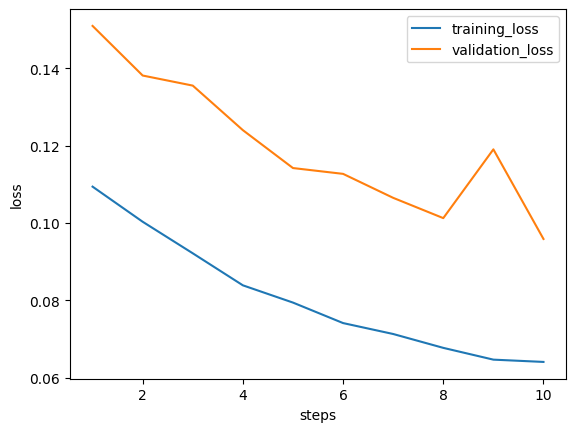

In [31]:
model,history = train_model(di_model,train_input_target,test_input_target,n_epochs,callbacks)

## Save best model for inference

In [32]:
best_monitored_metric,best_epoch = get_best_model(history,monitored_metric)
best_checkpoint_file = f'di_model.epoch{best_epoch:02d}-loss{best_monitored_metric:.5f}.keras'

best_model_savepath = os.path.join(model_checkpoint_folder,f'm-{calendar.month_abbr[selected_month]}_w-{window_size}_f-{n_input_features}_c-{missing_fraction}_n-{n_train_samples}_{model_type}_'+best_checkpoint_file)
best_model_archivepath = os.path.join(model_archive_folder,f'm-{calendar.month_abbr[selected_month]}_w-{window_size}_f-{n_input_features}_c-{missing_fraction}_n-{n_train_samples}_{model_type}_di_model_{model_identifier}')
print(f"Best model checkpoint:{best_model_savepath}")	
model_to_archive(best_model_savepath,best_model_archivepath)


Best model found at epoch:10 with val_loss:0.095864
Best model checkpoint:c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\dataimputation\model_checkpoints\123Bus\month_Feb\m-Feb_w-4_f-5_c-0.05_n-14400_lstm_di_model.epoch10-loss0.09586.keras
Copying keras model to:c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\dataimputation\saved_models\m-Feb_w-4_f-5_c-0.05_n-14400_lstm_di_model_vtest


## Create data for evaluation

In [33]:
df_eval = get_df_node_load_selected_nodes(df_node_load,cyclical_features,selected_eval_nodes,missing_fraction,multi_corruption=True,consequtive_corruption_probabilities=consequtive_missing_probabilities,replacement_methods=replacement_methods)
eval_input_target = df_to_input_target_dataset(df_eval,window_size,input_features,target_feature,batch_size,use_prefetch=True,df_type = "eval")

Selected 1 load nodes containing 2400 time steps were selected:['s12b'] (showing only first 50)
Encoding cyclical feature:hour_of_day
Encoding cyclical feature:day_of_week
Encoding cyclical feature:weekend
Probability of atleast one missing value:0.05
Probability of two consequtive missing values:0.0100
Probability of three consequtive missing values:0.0010
Probability of four consequtive missing values:0.0001


  0%|          | 0/2400 [00:00<?, ?it/s]

100%|██████████| 2400/2400 [00:00<00:00, 69063.83it/s]

Event at least one count:103
Event probability:one:0.0429
Event at least two count:17
Event probability:two:0.0071
Event at least three count:4
Event probability:three:0.0017
Event at least four count:0
Event probability:four:0.0000
Total missing value events:124
Number of corrupted values time stamps:124
FIlling NAN values using ffill...
First two elements in eval dataset:(array([[19.77268416, 19.77268416,  0.        ,  1.        ,  0.        ],
       [19.54044628, 19.54044628,  0.        ,  1.        ,  0.        ],
       [19.3082084 , 19.3082084 ,  0.        ,  1.        ,  0.        ],
       [19.21694362, 19.21694362,  0.        ,  1.        ,  0.        ]]), array([19.77268416, 19.54044628, 19.3082084 , 19.21694362]))
Checking moving window for window size 4 with input features:['load_value_corrupted', 'load_value_corrupted_ffill', 'corruption_encoding', 'cos_hour', 'sin_hour'] on 10 samples.


No difference detected!
TF eval dataset Cardinality:2397 - df size:2400
NAN in eval:False


## Get imputation predictions from kNN imputation model for comparison

In [34]:
knn_array = get_knn_array(df_eval,window_size,measurement_column,n_windows = 1400000)
knn_imputer = get_knn_imputer(knn_array,n_neighbors=10)
predictions_eval_knn = get_knn_imputer_predictions(knn_imputer,knn_array)

Array shape from knn dataset:(2397, 4, 1)
Array shape after reshape:(2397, 4)
Fitting KNN imputer with 2397 samples
Predicting using KNN imputer on 2397 samples


## Load and Evaluate pre-trained model

In [35]:
best_model = load_keras_model(best_model_savepath)
predictions_eval = evaluate_predict(best_model,input_target=eval_input_target)
df_comparison_eval = compare_performance_moving_window(df_eval,predictions_eval,window_size, n_windows = 1400000,alternate_predictions={"knn":predictions_eval_knn})

Loading Keras model:c:\Users\splathottam\Box Sync\GitHub\oedi-si-single-container\build\datapreprocessor\datapreprocessor\datapreprocessor\app\dataimputation\model_checkpoints\123Bus\month_Feb\m-Feb_w-4_f-5_c-0.05_n-14400_lstm_di_model.epoch10-loss0.09586.keras
Successfully loaded Keras model!
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 21678.4043 - mean_absolute_error: 124.2795
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Model performance metrics:[22093.583984375, 125.23333740234375]
Predictions shape:(2397, 4, 1)
Taking 1400000 element from dataset with cardinality:2397 and converting to Numpy array...
Array shape from dataset:(2397, 4, 3)
Array shape after reshape:(9588,)
Adding alternate prediction:knn
Calculation imputation accuracy meterics for 496 missing values...
MAE - ffill:0.214,DAE:197.511
MSE - ffill:0.136,DAE:48242.741
RMSE - ffill:0.369,DAE:219.642
knn - MAE:0.143,MSE::0.071,RMSE::0.267
Relative improvement in MAE - ffill:-92109.88
Relative improvement in RMSE - ffill:-59

## Use data imputation model on streaming data

In [28]:
monitored_nodes = list(df_eval["node_id"].unique()[0:10])
evaluate_dataimputation_on_streaming_data_multi_nodes(df_eval,best_model,monitored_nodes,window_size,input_features,timeinterval_mins=15)

Following 1 nodes will be observed:['s12b']
Moving window:0 starting at timestamp:2016-02-01 00:00:00
Moving window:1 starting at timestamp:2016-02-01 00:15:00
Moving window:2 starting at timestamp:2016-02-01 00:30:00
Moving window:3 starting at timestamp:2016-02-01 00:45:00
Moving window:4 starting at timestamp:2016-02-01 01:00:00
Moving window:5 starting at timestamp:2016-02-01 01:15:00
Moving window:6 starting at timestamp:2016-02-01 01:30:00
Moving window:7 starting at timestamp:2016-02-01 01:45:00
Moving window:8 starting at timestamp:2016-02-01 02:00:00
Moving window:9 starting at timestamp:2016-02-01 02:15:00
Missing data at time stamp:2016-02-01 02:15:00-node:s12b in moving window:9- AE imputation:335.35,ffill:19.22
Moving window:10 starting at timestamp:2016-02-01 02:30:00
Missing data at time stamp:2016-02-01 02:15:00-node:s12b in moving window:10- AE imputation:358.08,ffill:19.22
Moving window:11 starting at timestamp:2016-02-01 02:45:00
Missing data at time stamp:2016-02-01

In [29]:
print(f"Ffill MSE on eval data:{((df_train[df_train['data_quality']=='corrupted']['load_value']-df_train[df_train['data_quality']=='corrupted']['load_value_corrupted_ffill'])**2).mean():.2f}")
print(f"Ffill MSE on test data:{((df_test[df_test['data_quality']=='corrupted']['load_value']-df_test[df_test['data_quality']=='corrupted']['load_value_corrupted_ffill'])**2).mean():.2f}")
print(f"Ffill MSE on test data:{((df_eval[df_eval['data_quality']=='corrupted']['load_value']-df_eval[df_eval['data_quality']=='corrupted']['load_value_corrupted_ffill'])**2).mean():.2f}")

Ffill MSE on eval data:0.13
Ffill MSE on test data:1.14
Ffill MSE on test data:0.05
